In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.naive_bayes import GaussianNB as Gb

In [5]:
data=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NAVIES BAYES/SalaryData_Test.csv")

In [6]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
lab=LabelEncoder()

In [10]:
data['Salary']=lab.fit_transform(data['Salary'])

<Axes: >

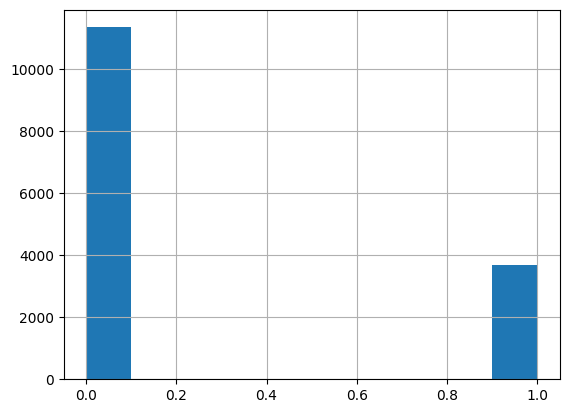

In [17]:
data['Salary'].hist()

<Axes: xlabel='Salary', ylabel='count'>

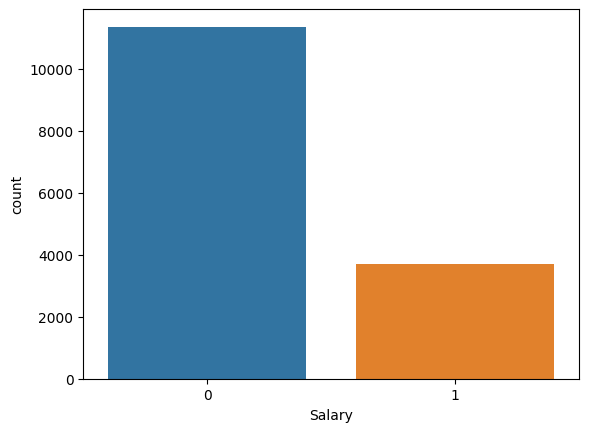

In [18]:
sns.countplot(x=data['Salary'])

In [20]:
col=['education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [22]:
for i in col:
    data[i]=lab.fit_transform(data[i])

In [15]:
data['workclass']=lab.fit_transform(data['workclass'])

In [23]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


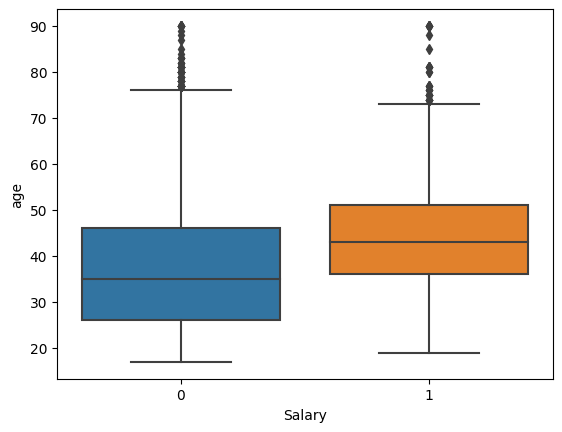

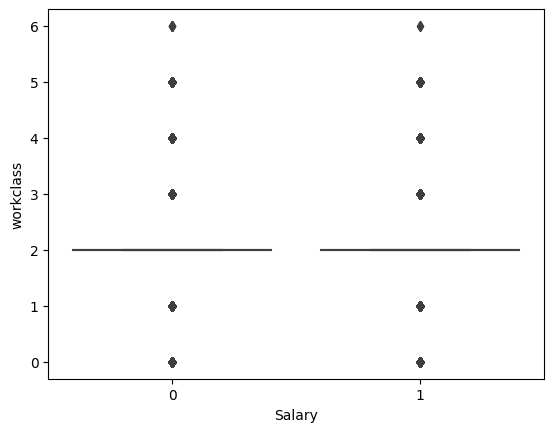

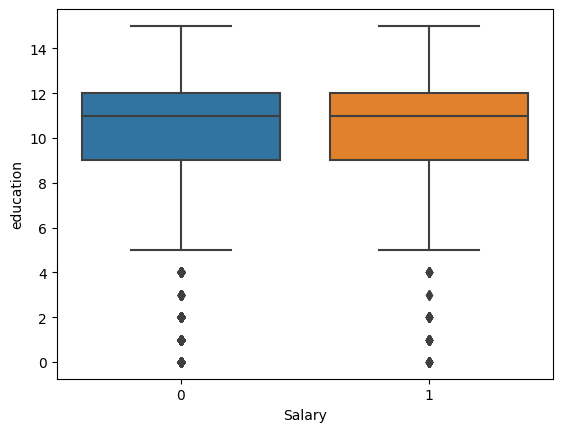

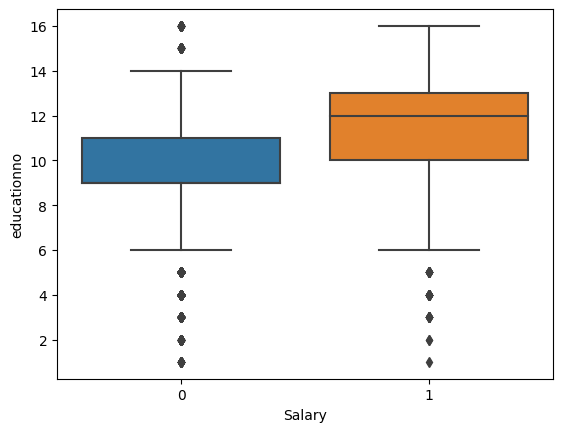

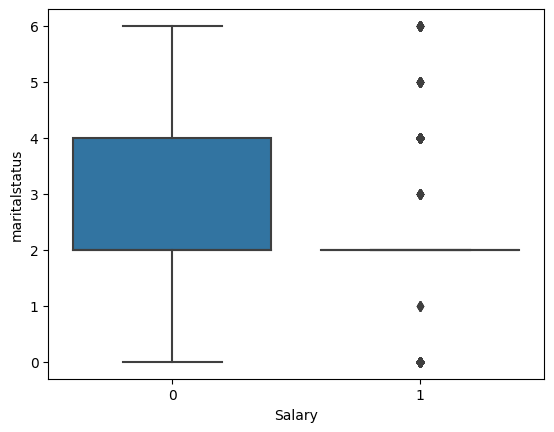

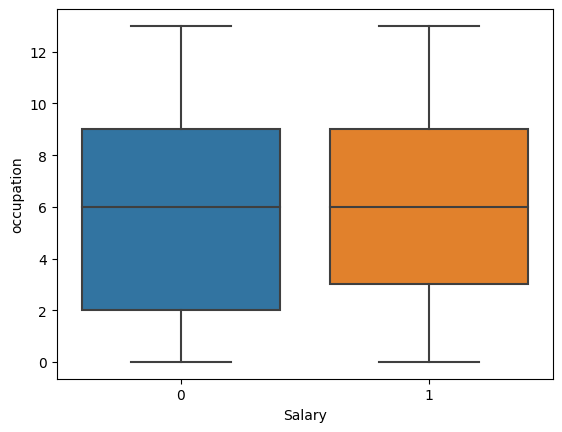

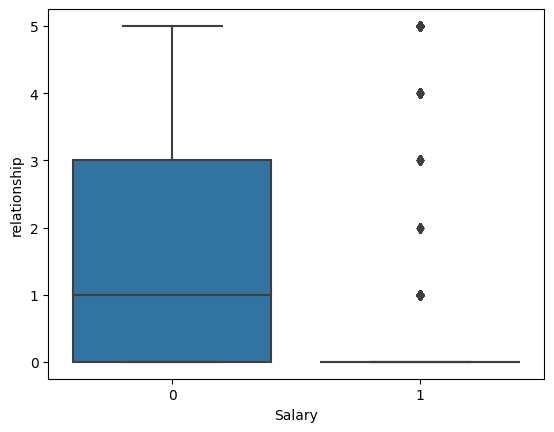

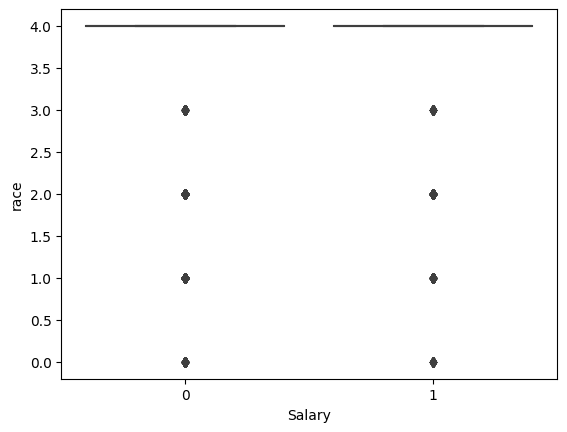

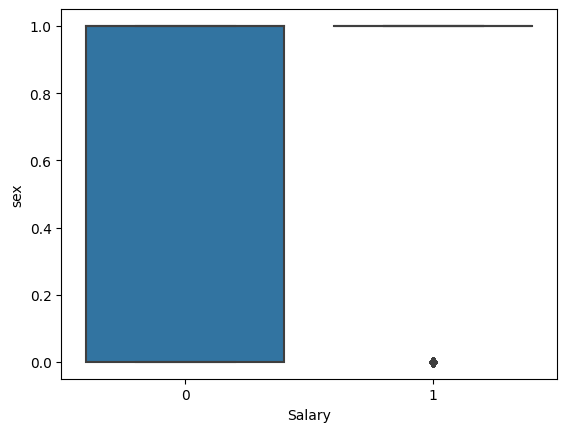

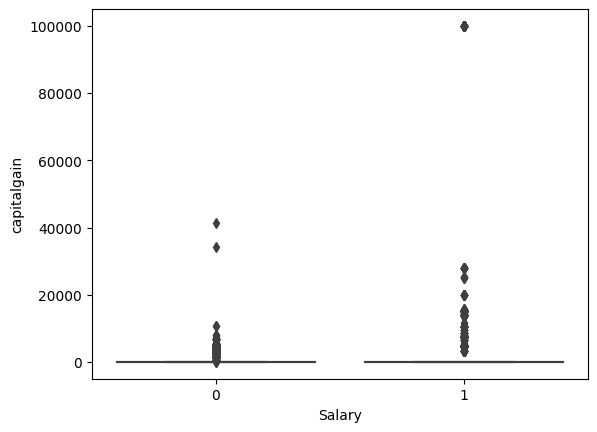

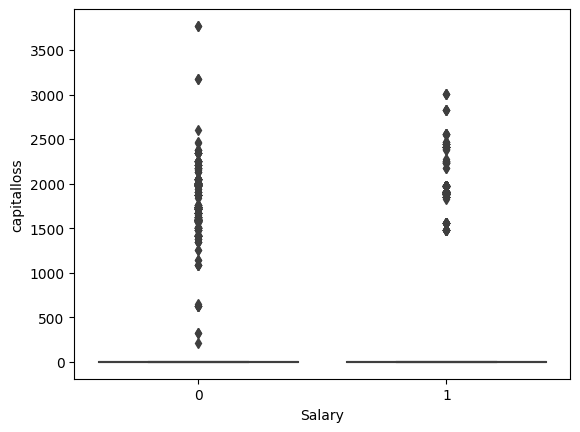

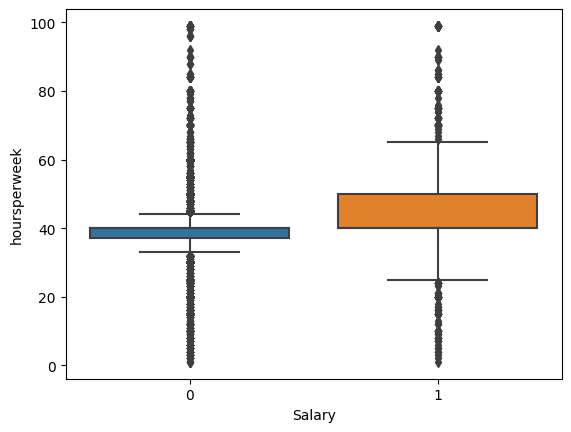

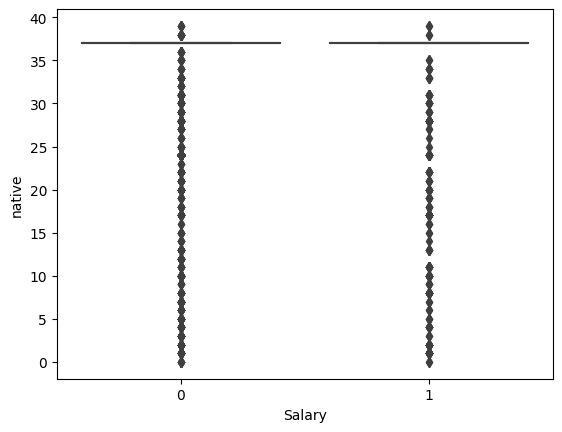

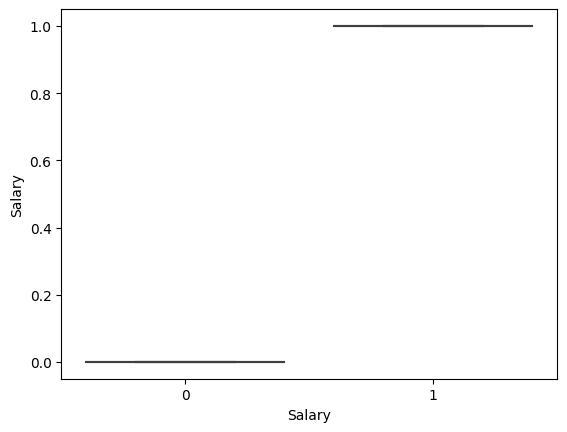

In [24]:
for col in data.columns:
    sns.boxplot(x=data['Salary'],y=data[col])
    plt.show()

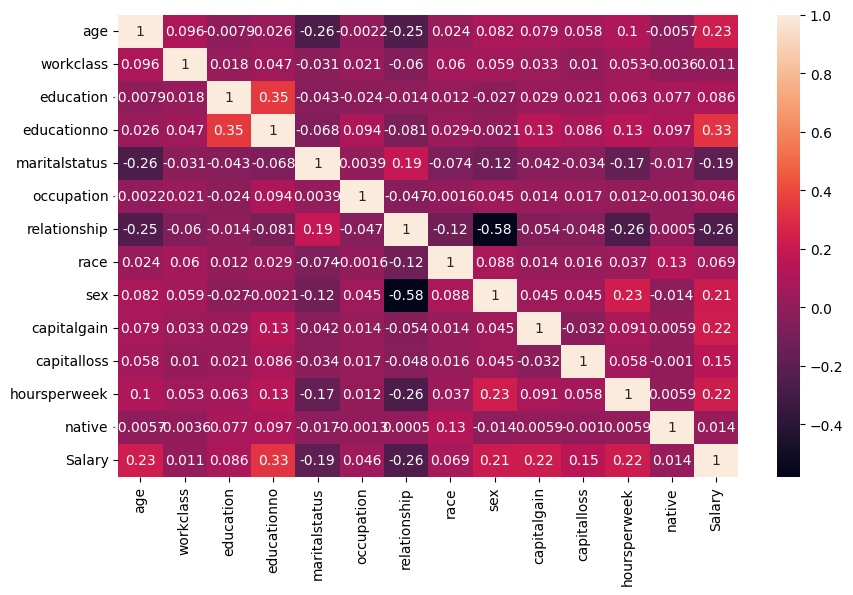

In [25]:
#corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
y=data.iloc[:,-1]
x=data.iloc[:,0:14]

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.6,random_state=13)

In [28]:
model=Gb()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6862
           1       0.92      0.97      0.95      2174

    accuracy                           0.97      9036
   macro avg       0.96      0.97      0.96      9036
weighted avg       0.97      0.97      0.97      9036

